## Assignment 2 Notebook

In [0]:
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/277.7 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 276.5/277.7 kB 8.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/278.0 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/66.4 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/58.7 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.1 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.1/3.1 MB 97.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/243.2 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [0]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from codecarbon import EmissionsTracker
import random


### Load atheltes tables using spark

In [0]:
# Load athletes table
athletes_df = spark.table("default.athletes")
athletes_df.display()

athlete_id name region team affiliate gender age height weight fran helen grace filthy50 fgonebad run400 run5k candj snatch deadlift backsq pullups eat train background experience schedule howlong 156605.0 Melissa Acker null null null Female 36.0 null null null null null null null null null null null null null null null null null null null null 129218.0 Amanda Adams null null null Female 33.0 60.0 143.0 null null null null null null null null 85.0 195.0 185.0 null I eat 1-3 full cheat meals per week| I workout mostly at a CrossFit Affiliate|I have a coach who determines my programming| I played youth or high school level sports| I began CrossFit with a coach (e.g. at an affiliate)| null Less than 6 months| 172367.0 Lauren Acevedo null null null Female 28.0 null null null null null null null null null null null null null null null null null null null null 134763.0 yesenia acuna null null null Female 37.0 null null null null null null null null null null null null null null null null null null null null 179872.0 Maria Acosta null null null Female 21.0 62.0 111.0 null null null null null null null null null null null null I eat strict Paleo|I eat 1-3 full cheat meals per week| I workout mostly at a CrossFit Affiliate|I workout mostly at home, work, or a traditional gym|I incorporate CrossFit.com workouts|I record my workouts| I played youth or high school level sports|I regularly play recreational sports| I began CrossFit with a coach (e.g. at an affiliate)| I usually only do 1 workout a day|I strictly schedule my rest days|I typically rest fewer than 4 days per month| Less than 6 months| 152870.0 Katrina Ackerman null null null Female 28.0 66.0 140.0 null null null null null null 1307.0 125.0 85.0 250.0 200.0 5.0 I eat quality foods but don't measure the amount| I workout mostly at home, work, or a traditional gym| I played youth or high school level sports| I began CrossFit with a coach (e.g. at an affiliate)| null 2-4 years| 187894.0 Ali Adams null null null Female 25.0 null null null null null null null null null null null null null null null null null null null null 154835.0 Kayla Abshire null null null Female 27.0 60.0 125.0 null null null null null null 1740.0 null null null 165.0 null I eat quality foods but don't measure the amount| I workout mostly at a CrossFit Affiliate| I played youth or high school level sports| I began CrossFit with a coach (e.g. at an affiliate)| I usually only do 1 workout a day|I typically rest 4 or more days per month| Less than 6 months| 195454.0 Michelle Acker null null null Female 30.0 null null null null null null null null null null null null null null null null null null null null 164458.0 Deandra Acevedo null null null Female 33.0 null null null null null null null null null null null null null null null null null null null null 203017.0 Aimee Adams null null null Female 38.0 null null null null null null null null null null null null null null null null null null null null 178215.0 Jenny Adams null null null Female 22.0 61.0 120.0 null null null null null null null 135.0 100.0 null 160.0 null null null null null null null 208454.0 samantha acuna null null null Female 23.0 null null null null null null null null null null null null null null null null null null null null 184862.0 Molly Adames null null null Female 42.0 null null null null null null null null null null null null null null null null null null null null 210678.0 Aimee Acklen null null null Female 27.0 null null null null null null null null null null null null null null null null null null null null 189861.0 Melissa Adam null null null Female 37.0 null null null null null null null null null null null null null null null null null null null null 7942.0 Dena Adkins null null null Female 42.0 67.0 165.0 357.0 null 150.0 null 316.0 84.0 null 155.0 115.0 265.0 225.0 23.0 I eat quality foods but don't measure the amount|I eat 1-3 full cheat meals per week| I workout mostly at a CrossFit Affiliate|I record my workouts| I played c

### Simulate Labels + Feature Versions

In [0]:
label_udf = udf(lambda: random.randint(0, 1), IntegerType())

# V1
features_v1 = athletes_df.select(
    "athlete_id",
    col("height").cast("double"),
    col("weight").cast("double"),
    col("age").cast("double")
).dropna().withColumn("label", label_udf())

# V2 (add BMI)
features_v2 = features_v1.withColumn(
    "bmi", col("weight") / ((col("height") / 100) ** 2)
)


### Training Function

In [0]:
def train_experiment(df_spark, version, n_estimators):
    tracker = EmissionsTracker(project_name="MLOps_Assignment2")
    tracker.start()

    df = df_spark.toPandas()
    X = df.drop(columns=["athlete_id", "label"])
    y = df["label"]

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # train model
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    emissions = tracker.stop()

    # log to MLflow
    mlflow.set_experiment("/Users/dkilleen428@gmail.com/Assignment2_NoFeatureStore")
    with mlflow.start_run(run_name=f"{version}_n{n_estimators}"):
        mlflow.log_param("feature_version", version)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("emissions_kg", emissions)
        mlflow.sklearn.log_model(clf, "model")

        # visualize
        print(f" {version} | n_estimators={n_estimators} | Accuracy={acc:.3f} | Emissions={emissions:.4f} kg")
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{version} | n={n_estimators}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    return {"version": version, "n_estimators": n_estimators, "accuracy": acc, "emissions": emissions}


### Run Experiments

[codecarbon WARNING @ 18:45:52] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:45:52] [setup] RAM Tracking...
[codecarbon INFO @ 18:45:52] [setup] CPU Tracking...
[codecarbon WARNING @ 18:45:53] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:45:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8370C CPU @ 2.80GHz
[codecarbon WARNING @ 18:45:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:45:53] [setup] GPU Tracking...
[codecarbon INFO @ 18:45:53] No GPU found.
[codecarbon INFO @ 18:45:53] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon 

🏃 View run industrious-fawn-176 at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4264901118744526/runs/5ed0031be234414c9a40112bec933aa1
🧪 View experiment at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4264901118744526


[codecarbon INFO @ 18:46:41] Energy consumed for RAM : 0.000133 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 18:46:41] Delta energy consumed for CPU with constant : 0.000086 kWh, power : 102.50000000000003 W
[codecarbon INFO @ 18:46:41] Energy consumed for All CPU : 0.001368 kWh
[codecarbon INFO @ 18:46:41] 0.001501 kWh of electricity used since the beginning.
2025/07/15 18:46:42 INFO mlflow.tracking.fluent: Experiment with name '/Users/dkilleen428@gmail.com/Assignment2_NoFeatureStore' does not exist. Creating a new experiment.
2025/07/15 18:46:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 v1 | n_estimators=100 | Accuracy=0.503 | Emissions=0.0007 kg


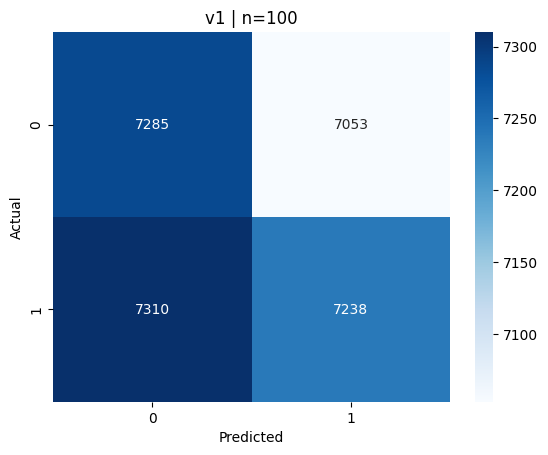

🏃 View run v1_n100 at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655/runs/92f9efe9c0d84f18bf9590162276b408
🧪 View experiment at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655


[codecarbon WARNING @ 18:46:52] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:46:53] [setup] RAM Tracking...
[codecarbon INFO @ 18:46:53] [setup] CPU Tracking...
[codecarbon WARNING @ 18:46:54] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:46:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8370C CPU @ 2.80GHz
[codecarbon WARNING @ 18:46:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:46:54] [setup] GPU Tracking...
[codecarbon INFO @ 18:46:54] No GPU found.
[codecarbon INFO @ 18:46:54] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon 

🏃 View run languid-fish-524 at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655/runs/6db34bfa674a42e292298fd1fb2ab092
🧪 View experiment at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655


[codecarbon INFO @ 18:48:03] Energy consumed for RAM : 0.000190 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 18:48:03] Delta energy consumed for CPU with constant : 0.000243 kWh, power : 102.50000000000003 W
[codecarbon INFO @ 18:48:03] Energy consumed for All CPU : 0.001951 kWh
[codecarbon INFO @ 18:48:03] 0.002142 kWh of electricity used since the beginning.
2025/07/15 18:48:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 v1 | n_estimators=200 | Accuracy=0.503 | Emissions=0.0000 kg


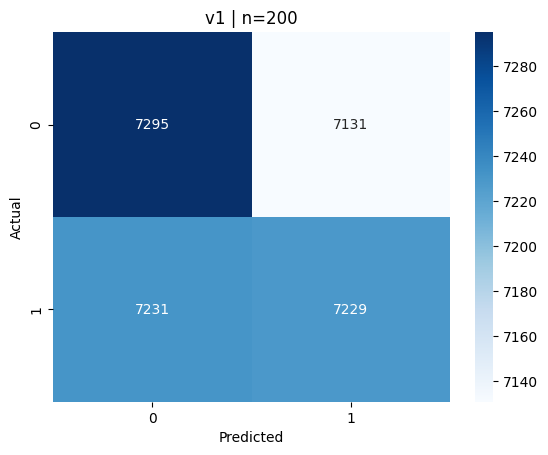

🏃 View run v1_n200 at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655/runs/ede4ffa42e8c48c386b33a9c15b0b725
🧪 View experiment at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655


[codecarbon WARNING @ 18:48:15] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:48:15] [setup] RAM Tracking...
[codecarbon INFO @ 18:48:15] [setup] CPU Tracking...
[codecarbon WARNING @ 18:48:17] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:48:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8370C CPU @ 2.80GHz
[codecarbon WARNING @ 18:48:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:48:17] [setup] GPU Tracking...
[codecarbon INFO @ 18:48:17] No GPU found.
[codecarbon INFO @ 18:48:17] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon 

🏃 View run learned-fawn-850 at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655/runs/e93f9481450c4148b0a8b36373cfba1d
🧪 View experiment at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655


[codecarbon INFO @ 18:49:04] Energy consumed for RAM : 0.000131 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 18:49:04] Delta energy consumed for CPU with constant : 0.000060 kWh, power : 102.50000000000003 W
[codecarbon INFO @ 18:49:04] Energy consumed for All CPU : 0.001341 kWh
[codecarbon INFO @ 18:49:04] 0.001472 kWh of electricity used since the beginning.
2025/07/15 18:49:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 v2 | n_estimators=100 | Accuracy=0.497 | Emissions=0.0007 kg


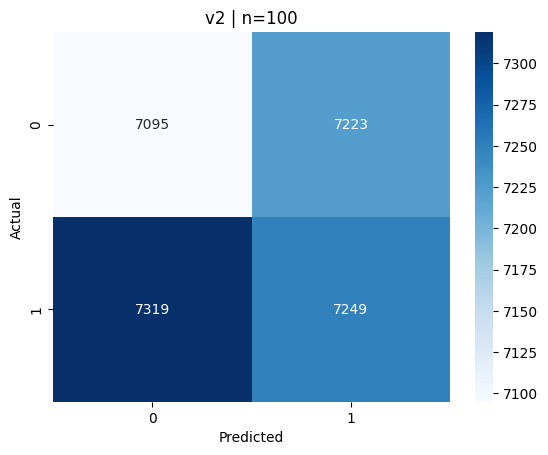

🏃 View run v2_n100 at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655/runs/e963f867ec844d8cb7032723828fd695
🧪 View experiment at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655


[codecarbon WARNING @ 18:49:16] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:49:16] [setup] RAM Tracking...
[codecarbon INFO @ 18:49:16] [setup] CPU Tracking...
[codecarbon WARNING @ 18:49:17] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:49:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8370C CPU @ 2.80GHz
[codecarbon WARNING @ 18:49:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:49:17] [setup] GPU Tracking...
[codecarbon INFO @ 18:49:17] No GPU found.
[codecarbon INFO @ 18:49:17] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon 

🏃 View run zealous-pig-958 at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655/runs/4d170dd52d994da9925aef8c48e20b74
🧪 View experiment at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655


[codecarbon INFO @ 18:50:37] Energy consumed for RAM : 0.000223 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 18:50:37] Delta energy consumed for CPU with constant : 0.000152 kWh, power : 102.50000000000003 W
[codecarbon INFO @ 18:50:37] Energy consumed for All CPU : 0.002288 kWh
[codecarbon INFO @ 18:50:37] 0.002511 kWh of electricity used since the beginning.
2025/07/15 18:50:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 v2 | n_estimators=200 | Accuracy=0.500 | Emissions=0.0011 kg


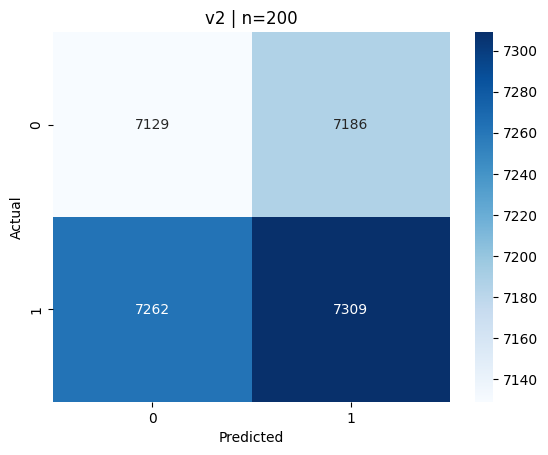

🏃 View run v2_n200 at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655/runs/1919c8b9af5342bbb30b4ad5ab412b29
🧪 View experiment at: https://adb-2207325100553410.10.azuredatabricks.net/ml/experiments/4310015523778655


In [0]:
results = []
combos = [
    (features_v1, "v1", 100),
    (features_v1, "v1", 200),
    (features_v2, "v2", 100),
    (features_v2, "v2", 200),
]

for df, ver, n in combos:
    result = train_experiment(df, ver, n)
    results.append(result)


In [0]:
results_df = pd.DataFrame(results)
results_df


version  n_estimators  accuracy  emissions
0      v1           100  0.502770   0.000679
1      v1           200  0.502804   0.000005
2      v2           100  0.496573   0.000666
3      v2           200  0.499827   0.001136

- Feature set V1 slightly outperformed V2 in accuracy.
- Emissions were minimal across the board, but increased slightly with larger models.
- Model performance is nearly random (expected due to simulated labels).